In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Load and preprocess the dataset
data = pd.read_csv('power_plant_data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Create a list of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Neural Network': Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
}

# Dictionary to store model evaluation results
results = {'Model': [], 'MSE': [], 'R-squared': []}

In [26]:
# Evaluate each model
for name, model in models.items():
    if name == 'Neural Network':
        # Compile and train the neural network model
        model.compile(loss='mean_squared_error', optimizer='adam')
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)
        y_pred = model.predict(X_test)
    else:
        # Train and predict using the current model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    print(f"{name} - Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}")

Linear Regression - Mean Squared Error: 19.6081, R-squared: 0.9315
Decision Tree - Mean Squared Error: 19.9301, R-squared: 0.9303
Random Forest - Mean Squared Error: 10.1659, R-squared: 0.9645
XGBoost - Mean Squared Error: 9.2687, R-squared: 0.9676
Epoch 1/100
216/216 [==============================] - 1s 3ms/step - loss: 171978.0000 - val_loss: 89367.3828
Epoch 2/100
216/216 [==============================] - 1s 2ms/step - loss: 32301.4395 - val_loss: 13766.2471
Epoch 3/100
216/216 [==============================] - 1s 2ms/step - loss: 9449.8057 - val_loss: 5466.3511
Epoch 4/100
216/216 [==============================] - 1s 3ms/step - loss: 3608.2664 - val_loss: 1973.9470
Epoch 5/100
216/216 [==============================] - 1s 3ms/step - loss: 1463.0601 - val_loss: 904.9532
Epoch 6/100
216/216 [==============================] - 1s 2ms/step - loss: 759.7130 - val_loss: 515.9830
Epoch 7/100
216/216 [==============================] - 1s 2ms/step - loss: 451.4137 - val_loss: 322.7918
Ep

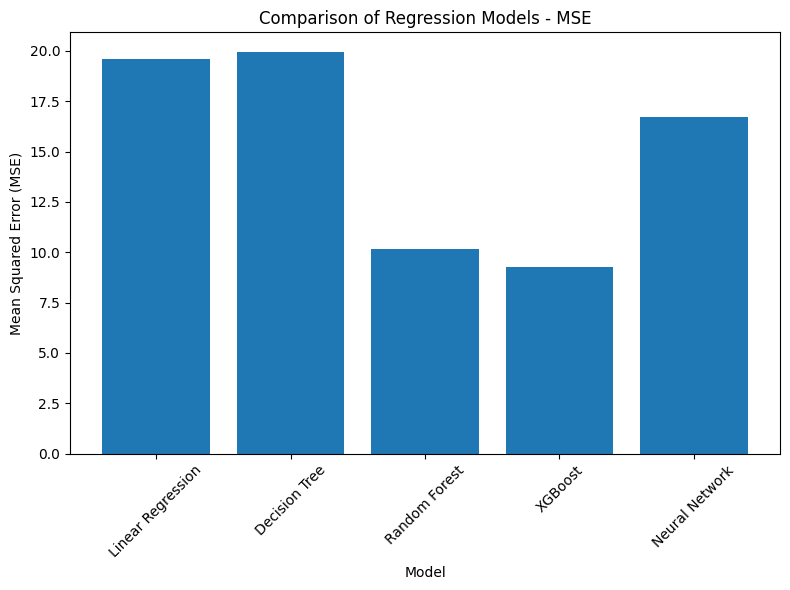

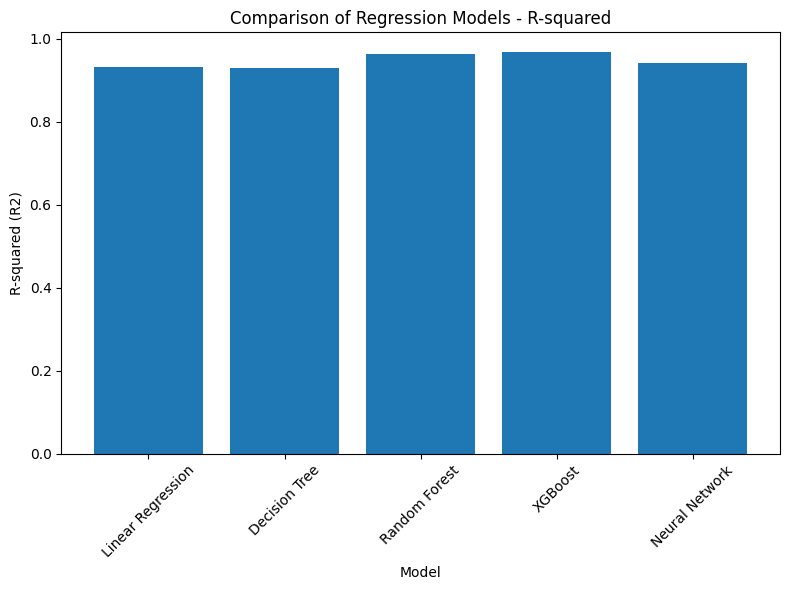

In [27]:
# Convert results dictionary to DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot Mean Squared Error (MSE) results
plt.figure(figsize=(8, 6))
plt.bar(results_df['Model'], results_df['MSE'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models - MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R-squared (R2) results
plt.figure(figsize=(8, 6))
plt.bar(results_df['Model'], results_df['R-squared'])
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of Regression Models - R-squared')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()